In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import RFE

# !pip install imblearn
from imblearn.over_sampling import SMOTE

In [3]:
%matplotlib inline

# 

## Load data 

In [4]:
# Breast cancer dataset is accessible from sklearn or directly from https://goo.gl/U2Uwz2
# This dataset is used in a Kaggle competition as well (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [5]:
# Print out the information of dataset. 

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# No missing data! 

X.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
print(data.target_names)
y = pd.DataFrame(data = data.target, columns = ['type'])

['malignant' 'benign']


,benign
0,0
1,0
2,0
3,0
4,0


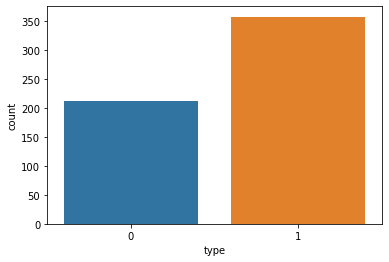

In [10]:
# According to dataset description, there is 212 Malignant, and 357 Benign samples. 
# This plot confirms type 1 in target refers to Benign (non-cancerous mass). Column name is changed to Benign. 

sns.countplot(x='type', data=y)
y = y.rename(columns = {"type":"benign"})
y.head()

In [11]:
print("Proportion of Benign (non cancerous) samples in data:", round(len(y[y['benign'] == 1])/len(y)*100, 2), '%')
print("Proportion of Malignant (cancerous) samples in data:", round(len(y[y['benign'] == 0])/len(y)*100, 2), '%')

Proportion of Benign (non cancerous) samples in data: 62.74 %
Proportion of Malignant (cancerous) samples in data: 37.26 %


# 

## Data visualization 

In [12]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

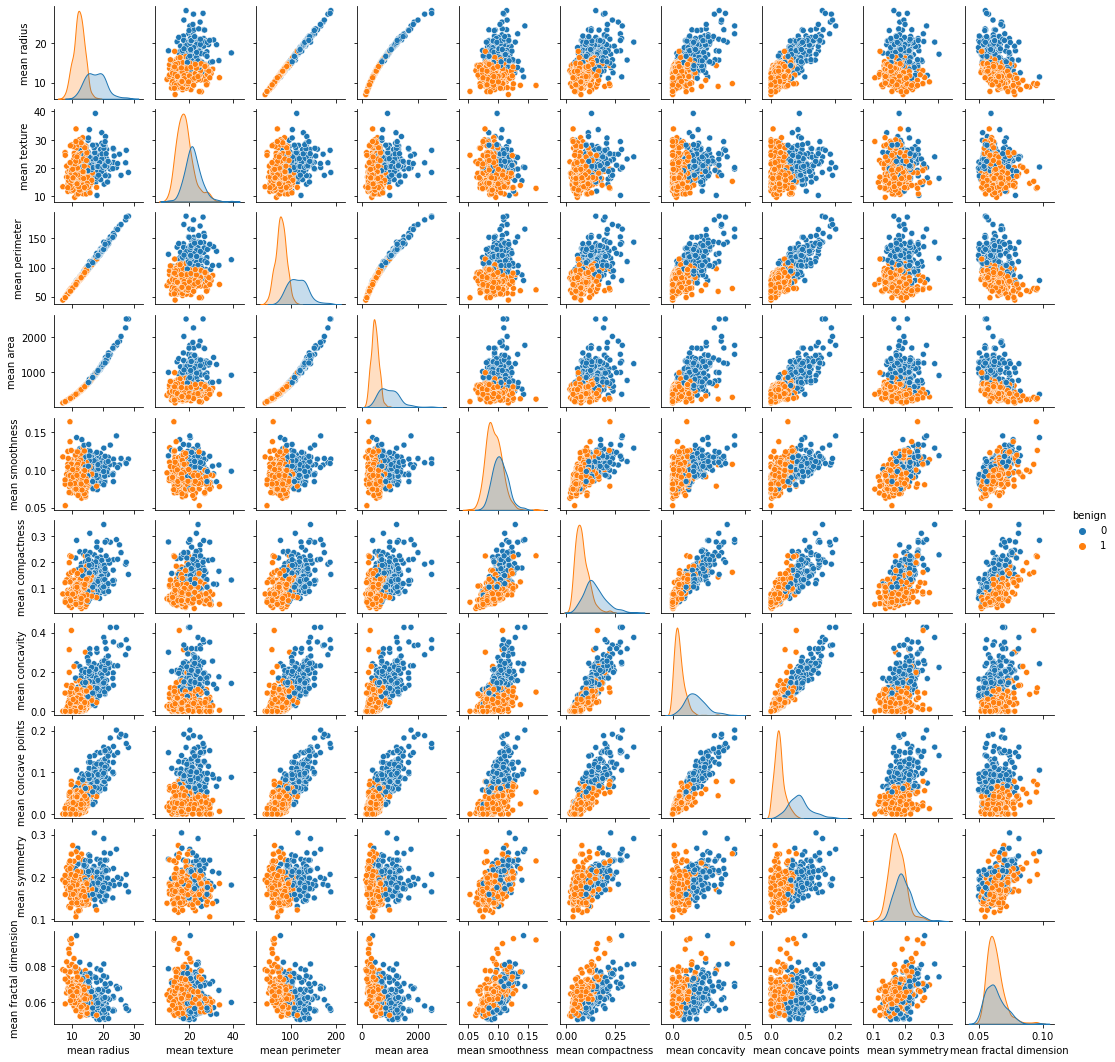

In [13]:
# Visualizing mean values

_df = X.iloc[:, 0:10]
df = _df.merge(y, left_on=None, right_on=None, left_index=True, right_index=True)
sns.pairplot(df, hue='benign', height=1.5)

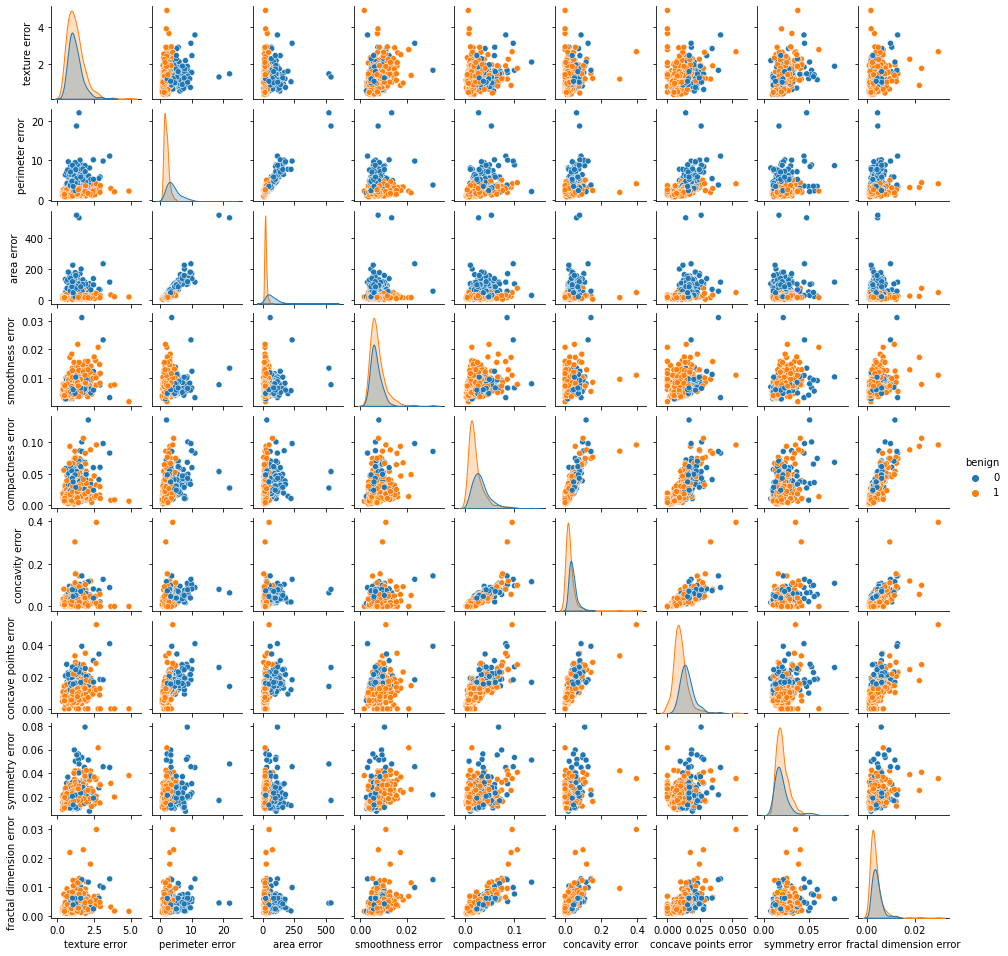

In [14]:
# Visualizing standard daviation (i.e., error) values

_df = X.iloc[:, 11:20]
df = _df.merge(y, left_on=None, right_on=None, left_index=True, right_index=True)
sns.pairplot(df, hue='benign', height=1.5)

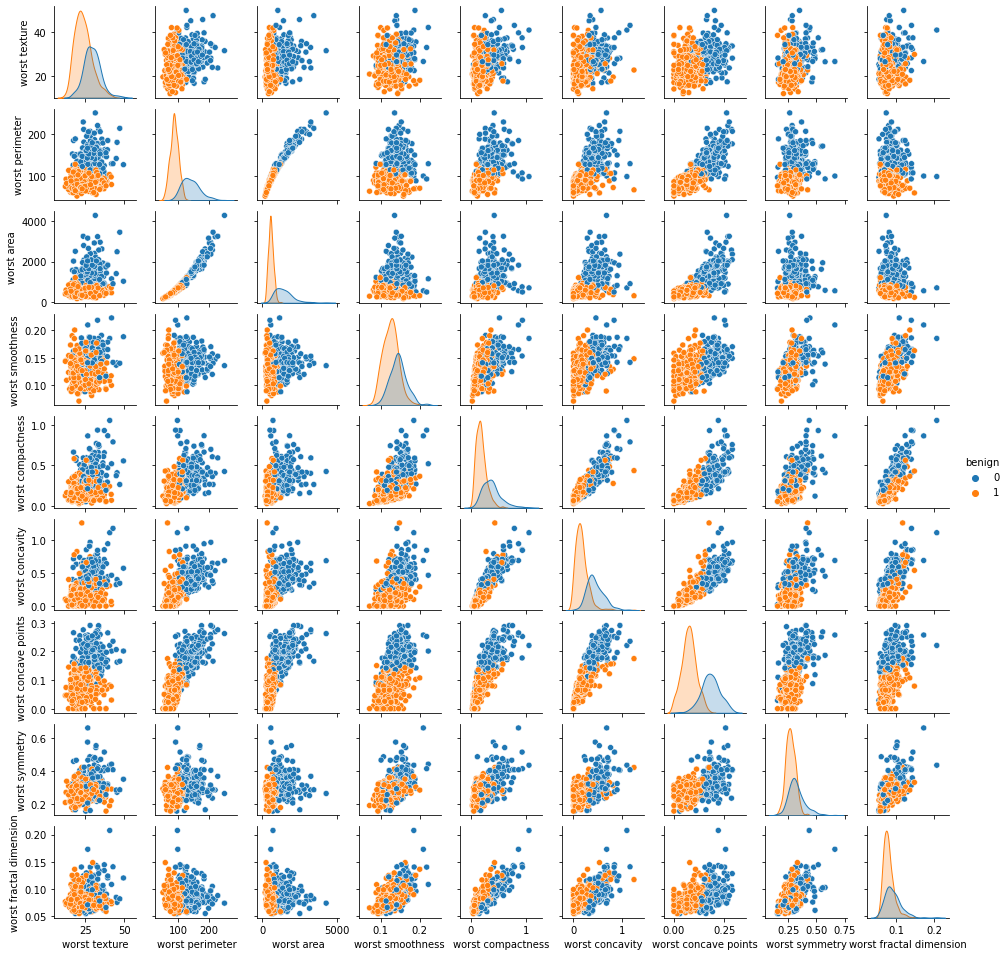

In [15]:
# Visualizing mean of the three largest (i.e., worst) values

_df = X.iloc[:, 21:30]
df = _df.merge(y, left_on=None, right_on=None, left_index=True, right_index=True)
sns.pairplot(df, hue='benign', height=1.5)

<AxesSubplot:>

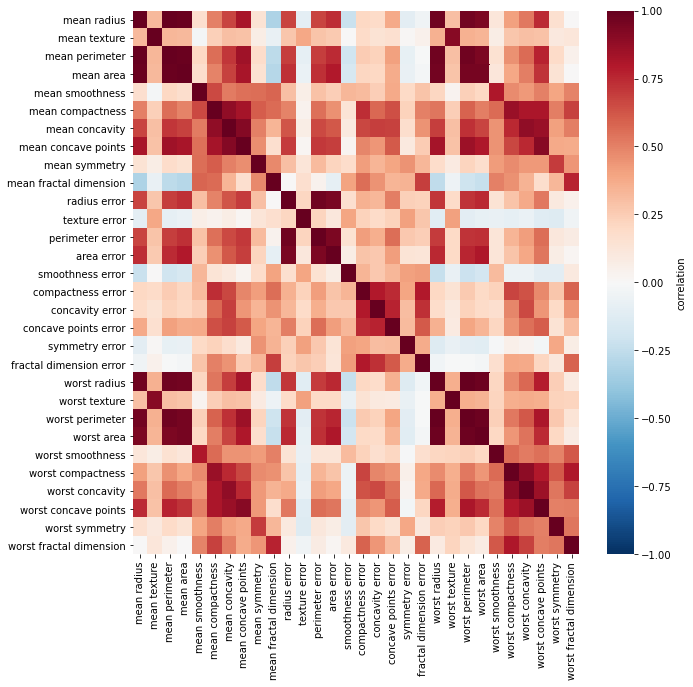

In [21]:
# Correlations between numerical features

# Select numerical features(i.e., float) and compute correlations between them
num_features = X.select_dtypes(include=['float64']).columns.values
df_corr = X[num_features].corr()

# Plot correlations as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', xticklabels=True, yticklabels=True, cbar_kws={'label' : 'correlation'}, ax=ax)

# 

## Modeling 

#### Split data to train and test 

In [22]:
# Split data into train and test 
# 30% of data is kept to test ML model. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Function

In [23]:
def run_randomforest(X_train, X_test, y_train, y_test):
    #
    # Define classification model
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Accuracy of random forest classifier on test set:' , score)
    #
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(model, X_test, y_test, normalize='true')  
    plt.show() 
    # 
    # Plot ROC curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='model (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

#### RandomForest classifier 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy of random forest classifier on test set: 0.9590643274853801


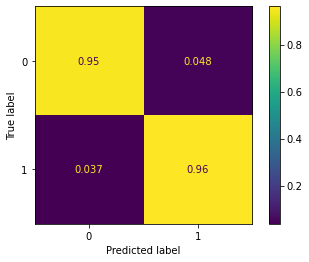

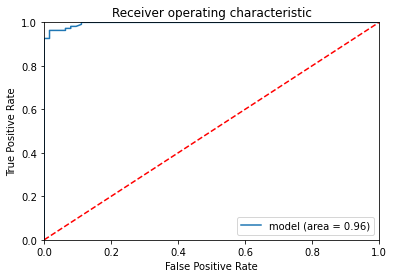

In [24]:
run_randomforest(X_train, X_test, y_train, y_test)

# 

#### Feature selection using feature importance for RandomForest classifier

In [28]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:234: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [26]:
sel.get_support()
features = X_train.columns[sel.get_support()]
print('number of selected features:', len(features))
features.tolist()

number of selected features: 9


['mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concavity',
 'worst concave points']

In [27]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy of random forest classifier on test set: 0.9415204678362573


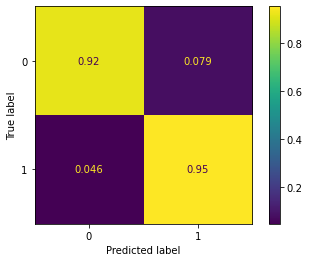

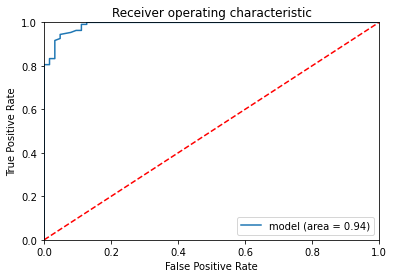

In [127]:
run_randomforest(X_train_sel, X_test_sel, y_train, y_test)

#### Feature selection using RFE for RandomForest classifier

In [29]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [30]:
sel.get_support()
features = X_train.columns[sel.get_support()]
print('number of selected features:', len(features))
features.tolist()

number of selected features: 15


['mean texture',
 'mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry']

In [31]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy of random forest classifier on test set: 0.9649122807017544


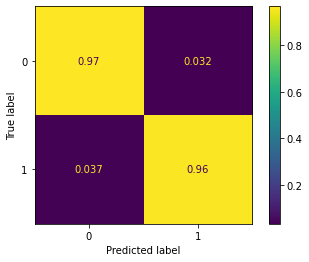

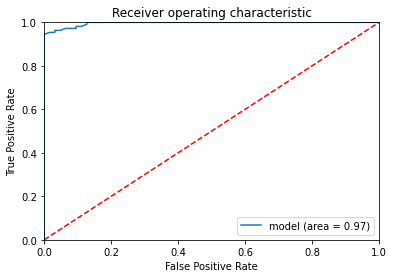

In [32]:
run_randomforest(X_train_rfe, X_test_rfe, y_train, y_test)

# 